In [1]:
'''
使用 BDdys503.20190528.csv 進行模型建構 Svesson model 
when : 2019-08-10 
what : svesson model , least square and etc
where : 
who : Dr.ctlin , Boon hong
why : 
how : python

csv 資料内容説明
報表說明：							
1.存續期間以理論價格為計算基礎							
2.報價所提供之價格，為等殖成交系統中之收盤最佳公開報價							
3.成交價為等殖成交系統公開報價成交之成交量加權平均							
4.理論價以本中心計算之零息殖利率曲線(Steeley Cubic B-Spline Model)，推算出之理論價格							

'''
import pandas as pd
import numpy as np
import math as m
import matplotlib.pyplot as pt 
from matplotlib import style
style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
df = pd.read_csv('BDdys503.20190528.csv')

In [3]:
f = lambda bp , t : -(1/t) * (np.log(bp/100.0)) * 100

''' variable explanation 
bp : bond price
t : duration (if i using duration , that means the bond does't has coupon)
'''
f(97.5,0.25)
f = lambda y , t : 100 * np.exp(-y*t)
f(0.101271 , 0.25)

97.50000565346842

In [4]:
''' variable explanation
bc : bond code
bn : bond name
md : maturity time
ttm : time to maturity
duration : duration
cr % : coupon rate  , unit = % 
m : coupon frequency
ty % : theoretical yield , unit = % 
tn : theoretical bond price
'''
df = df[['bc','bn','md','ttm','duration','cr %','m','ty %','tn']]
df = df.sort_values('ttm')
df['m'] = 1
print(df.head())

'''
zr : zero rate , unit = %
zero rate bond price : custom count bond price , function is lambda y , t : 100 * m.exp(-y*t) 
conclusion , tn isn't zero rete bond , the bond is over price , so zero rate bond price is under face value now .. 
'''

for i in np.arange(df['md'].shape[0]):
    ''' 程式流程
    m 為日期 以 / 作爲分割 
    0 year example :102 + 1911 = 等於西元日期
    1 month example : 06 取整數 6   
    2 day example : 15 取 整數
    '''
    m = str(df['md'][i]).split('/')
    year = int(float(m[0]) + 1911)
    month = int(m[1])
    day = int(m[2])
    date = ql.Date(day,month,year)
    df['md'][i] = "%d-%d-%d"%(date.dayOfMonth(),date.month(),date.year())

    df['zero rate bond price'] = np.zeros(df.shape[0])

for i in range(df.shape[0]):
    df['zero rate bond price'][i] = f(df['ty %'][i]/100,df['duration'][i])

         bc       bn         md   ttm  duration   cr %  m    ty %        tn
28   A03109  103央債甲9  108/06/27  0.08      0.08  1.125  1  0.4802  100.0491
29   A03110  103央甲10  108/07/18  0.13      0.13  1.125  1  0.4777  100.0864
63   A06107  106央債甲7  108/07/27  0.16      0.16  0.500  1  0.4774  100.0034
110  A98106   98央債甲6  108/09/09  0.28      0.28  1.375  1  0.4775  100.2494
34   A03115  103央甲15  108/10/15  0.38      0.38  1.250  1  0.4785  100.2900


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
print(df.head())

         bc       bn          md   ttm  duration   cr %  m    ty %        tn  \
28   A03109  103央債甲9   27-6-2019  0.08      0.08  1.125  1  0.4802  100.0491   
29   A03110  103央甲10   18-7-2019  0.13      0.13  1.125  1  0.4777  100.0864   
63   A06107  106央債甲7   27-7-2019  0.16      0.16  0.500  1  0.4774  100.0034   
110  A98106   98央債甲6    9-9-2019  0.28      0.28  1.375  1  0.4775  100.2494   
34   A03115  103央甲15  15-10-2019  0.38      0.38  1.250  1  0.4785  100.2900   

     zero rate bond price  
28              99.961591  
29              99.937918  
63              99.923645  
110             99.866389  
34              99.818335  


In [6]:
df['m'] = np.trunc(df['ttm'])

In [7]:
r = lambda duration , face , bondprice : -(1/duration) * np.log(bondprice/face) * 100
df['zera rate %']= r(df['duration'],100.0,df['zero rate bond price'])

In [8]:
print(df.head())

         bc       bn          md   ttm  duration   cr %    m    ty %  \
28   A03109  103央債甲9   27-6-2019  0.08      0.08  1.125  0.0  0.4802   
29   A03110  103央甲10   18-7-2019  0.13      0.13  1.125  0.0  0.4777   
63   A06107  106央債甲7   27-7-2019  0.16      0.16  0.500  0.0  0.4774   
110  A98106   98央債甲6    9-9-2019  0.28      0.28  1.375  0.0  0.4775   
34   A03115  103央甲15  15-10-2019  0.38      0.38  1.250  0.0  0.4785   

           tn  zero rate bond price  zera rate %  
28   100.0491             99.961591       0.4802  
29   100.0864             99.937918       0.4777  
63   100.0034             99.923645       0.4774  
110  100.2494             99.866389       0.4775  
34   100.2900             99.818335       0.4785  


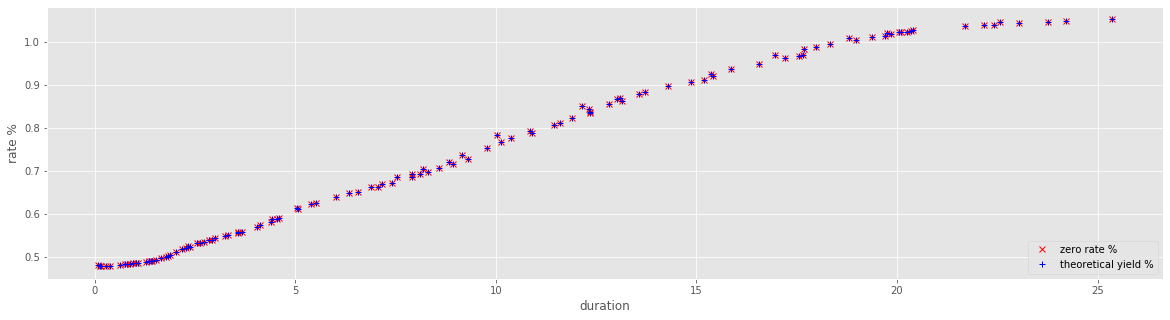

In [9]:
rcParams['figure.figsize'] = 20, 5
pt.plot(df.duration,df['zera rate %'],'rx',label = 'zero rate %')
pt.plot(df.duration,df['ty %'],'b+',label = 'theoretical yield %')
pt.xlabel('duration')
pt.ylabel('rate %')
pt.legend(loc= 'lower right')

In [10]:
t = np.array(df['duration'])
y = np.array(df['zera rate %'])

In [14]:
'''
linear least square
'''
# print(yi)

from scipy.optimize import leastsq
from scipy.optimize import fmin_cg
from scipy.optimize import least_squares


a = lambda t , tau : (1 - np.exp(-t/tau) )/(t/tau)

b = lambda t , tau : (1 - np.exp(-t/tau) )/(t/tau) - np.exp(-t/tau)

def nelson_siegel_model(p,t):
    p0 , p1 , p2 , tau  =  p
    return ( p0 + p1 * a(t,tau) + p2 * b(t,tau) )

def svensson_model(p,t):
    p0 , p1 , p2 , p3 , tau1 , tau2 = p
    return ( p0 + p1 * a(t,tau1) + p2 * b(t,tau1) + p3 * b(t,tau2) )

def ns_error(p,t,y):
    return y - nelson_siegel_model(p,t)

def sv_error(p,t,y):
    return y - svensson_model(p,t)


''' old code
    def svensson_exp_tau(tau,t):  
        return ( 1 - np.exp( -(t / tau) ) ) / ( t / tau)

    def n_svensson_model(params, t):
        b0,b1,b2,b3,tau1,tau2 = params 
        svensson = b0 +\
        b1 * svensson_exp_tau(tau1,t) +\
        b2 *( svensson_exp_tau(tau1,t) - np.exp( -(t/tau1) ) ) +\
        b3 *( svensson_exp_tau(tau2,t) - np.exp(-(t/tau2)) )
        return svensson

    def error(params , t , y):
        return y - n_svensson_model(params,t)

'''


def jac(params, t, yi):
    J = np.empty((t.size, params.size))
    J[:, 0] = 1.0
    J[:, 1] = a(params[4],t)
    J[:, 2] = a(params[4],t) - np.exp( -(t/params[4]) )
    J[:, 3] = a(params[5],t) - np.exp( -(t/params[5]) )
    J[:, 4] = (params[1]/t) * (1 - ( np.exp(-t/params[4]) + np.exp(-t/params[4]) * t / params[4] ) ) + params[2] *  ( ( 1- np.exp(-t/params[4]) )/t - np.exp(-t/params[4]) * (1/params[4] + t/(params[4] **2 )) )
    J[:, 5] = params[3] *  ( ( 1- np.exp(-t/params[5]) )/t - np.exp(-t/params[5]) * (1/params[5] + t/(params[5] **2 )) )
    return J

po = np.array([0.02, -0.01, -0.01, 0, 2 , 2])

p1 = np.array([0.0,0.0,0.0,0])

params = leastsq(sv_error , po , args=(t,y))
res = least_squares(sv_error, po, jac=jac , args=(t, y), verbose=1)

params = params[0]


# params_ns = leastsq(ns_error , p1 , args=(t,y))

# params_ns = params_ns[0]

'''
show parameter
'''
par = "b0,b1,b2,b3,tau1,tau2".split(',')
for i in range(po.size) :
    print('parameter {} , svesson least sq {} , svesson non-least sq {} '.format(par[i]  , params[i] , res.x[i]) )

df['svesson model least sq % (linear)'] = svensson_model(params,t)
df['svesson model least sq % (non-linear)'] = svensson_model(res.x,t)
# df['svesson model non linear cg zero rate %'] = svensson_model(res2.x,t)

`xtol` termination condition is satisfied.
Function evaluations 16, initial cost 3.2423e+01, final cost 3.2423e+01, first-order optimality 8.40e+01.
parameter b0 , svesson least sq -9.79667499591724 , svesson non-least sq 0.02 
parameter b1 , svesson least sq 10.328288216657404 , svesson non-least sq -0.01 
parameter b2 , svesson least sq -177.8669513556934 , svesson non-least sq -0.01 
parameter b3 , svesson least sq -0.27056578043798946 , svesson non-least sq 0.0 
parameter tau1 , svesson least sq -3822.0982296485795 , svesson non-least sq 2.0 
parameter tau2 , svesson least sq 0.7361677213675533 , svesson non-least sq 2.0 


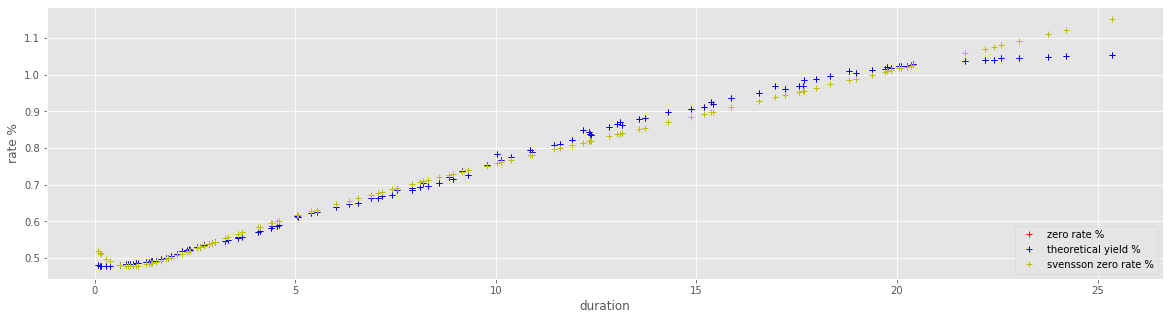

In [15]:
rcParams['figure.figsize'] = 20, 5
pt.plot(df.duration,df['zera rate %'],'r+',label = 'zero rate %')
pt.plot(df.duration,df['ty %'],'b+',label = 'theoretical yield %')
pt.plot(df.duration,df['svesson model least sq % (linear)'],'y+',label = 'svensson zero rate %')
# pt.plot(df.duration,df['svesson model least sq % (non-linear)'],'g+',label = 'non-linear least square svensson zero rate %')
pt.xlabel('duration')
pt.ylabel('rate %')
pt.legend(loc= 'lower right')
pt.show()

In [16]:
print(df.head())

         bc       bn          md   ttm  duration   cr %    m    ty %  \
28   A03109  103央債甲9   27-6-2019  0.08      0.08  1.125  0.0  0.4802   
29   A03110  103央甲10   18-7-2019  0.13      0.13  1.125  0.0  0.4777   
63   A06107  106央債甲7   27-7-2019  0.16      0.16  0.500  0.0  0.4774   
110  A98106   98央債甲6    9-9-2019  0.28      0.28  1.375  0.0  0.4775   
34   A03115  103央甲15  15-10-2019  0.38      0.38  1.250  0.0  0.4785   

           tn  zero rate bond price  zera rate %  \
28   100.0491             99.961591       0.4802   
29   100.0864             99.937918       0.4777   
63   100.0034             99.923645       0.4774   
110  100.2494             99.866389       0.4775   
34   100.2900             99.818335       0.4785   

     svesson model least sq % (linear)  svesson model least sq % (non-linear)  
28                            0.519904                               0.010003  
29                            0.513559                               0.010007  
63            

In [17]:
df

,bc,bn,md,ttm,duration,cr %,m,ty %,tn,zero rate bond price,zera rate %,svesson model least sq % (linear),svesson model least sq % (non-linear)
28,A03109,103央債甲9,27-6-2019,0.08,0.08,1.125,0.0,0.4802,100.0491,99.961591,0.4802,0.519904,0.010003
29,A03110,103央甲10,18-7-2019,0.13,0.13,1.125,0.0,0.4777,100.0864,99.937918,0.4777,0.513559,0.010007
63,A06107,106央債甲7,27-7-2019,0.16,0.16,0.500,0.0,0.4774,100.0034,99.923645,0.4774,0.510082,0.010010
110,A98106,98央債甲6,9-9-2019,0.28,0.28,1.375,0.0,0.4775,100.2494,99.866389,0.4775,0.498413,0.010030
34,A03115,103央甲15,15-10-2019,0.38,0.38,1.250,0.0,0.4785,100.2900,99.818335,0.4785,0.491094,0.010055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,A06106,106央債甲6,26-5-2047,27.99,22.41,1.875,27.0,1.0412,120.1531,79.188989,1.0412,1.076547,0.018215
67,A06111,106央甲11,24-11-2047,28.49,23.04,1.625,28.0,1.0459,114.2019,78.586099,1.0459,1.092420,0.018264
71,A07104,107央債甲4,18-5-2048,28.97,23.77,1.500,28.0,1.0482,111.2362,77.945748,1.0482,1.110801,0.018317
77,A07110,107央甲10,9-11-2048,29.45,24.22,1.375,29.0,1.0501,108.1912,77.543259,1.0501,1.122126,0.018349


In [18]:
# df.to_csv('data_result.csv')